In [53]:
import pickle
from aeon.regression.convolution_based import RocketRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pickle

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_to_read = open("preprocessed_data.pickle", "rb")

pipe = pickle.load(file_to_read)

file_to_read.close()

C:\Users\herli\anaconda3\envs\aeon-env\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Multirocket

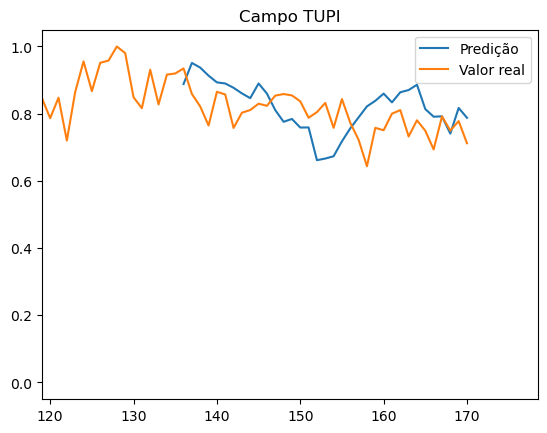

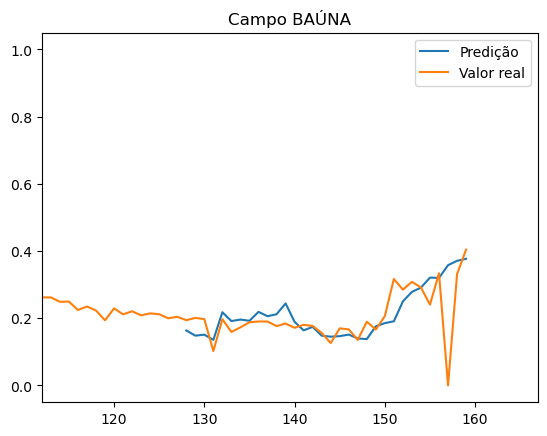

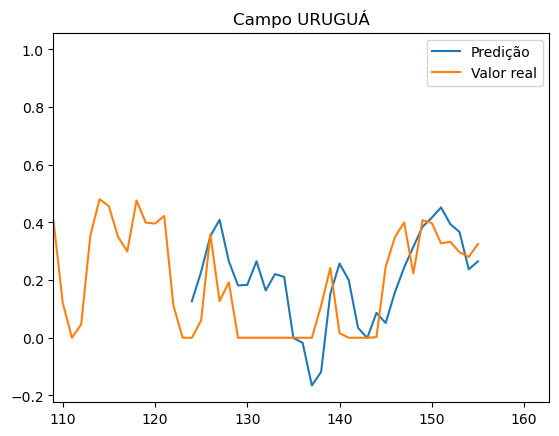

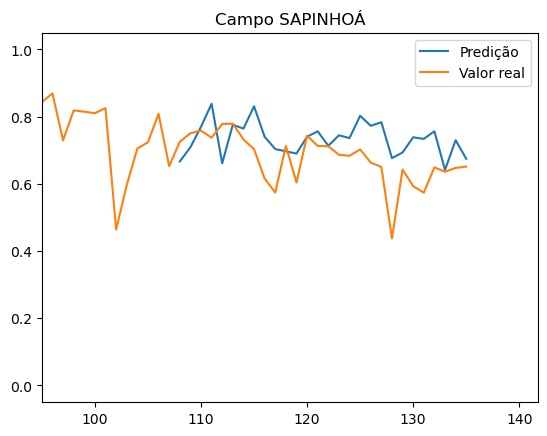

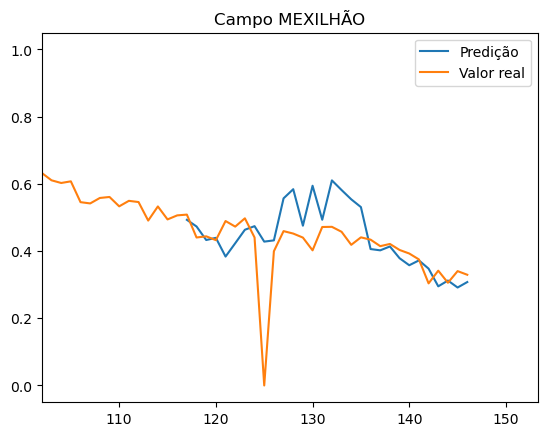

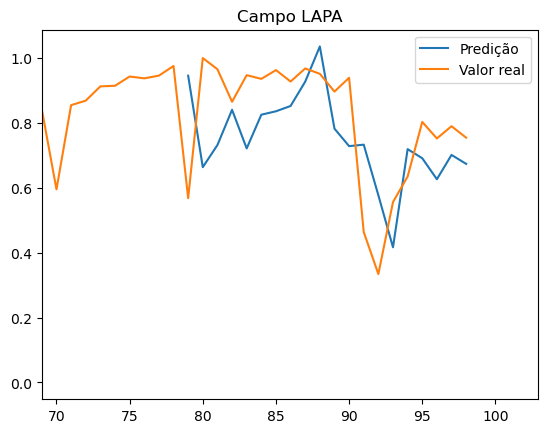

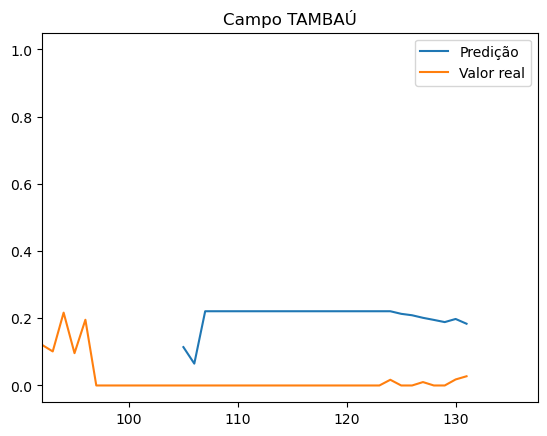

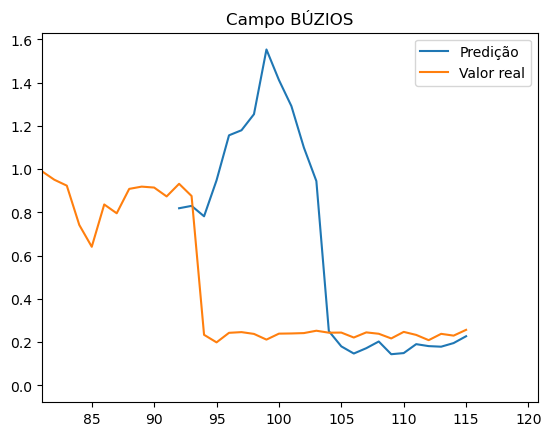

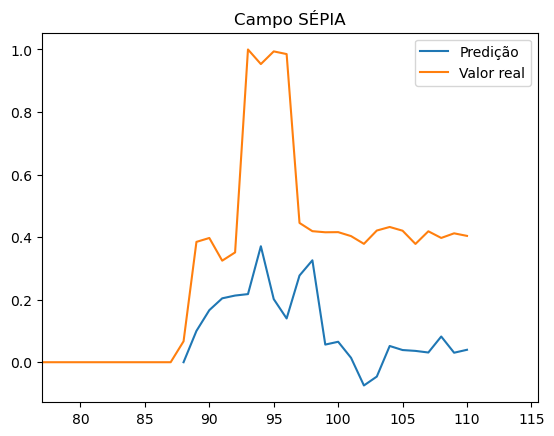

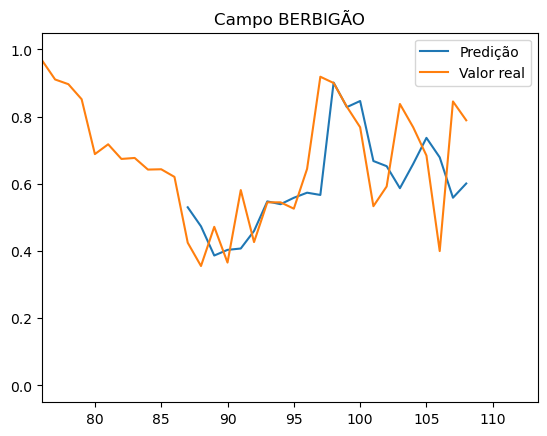

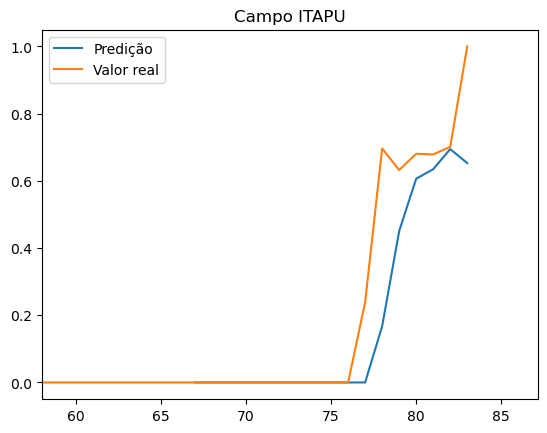

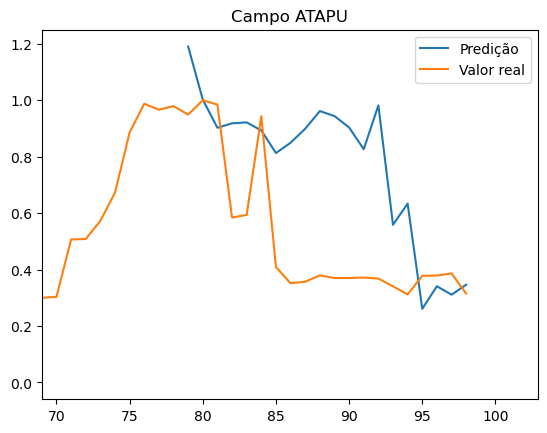

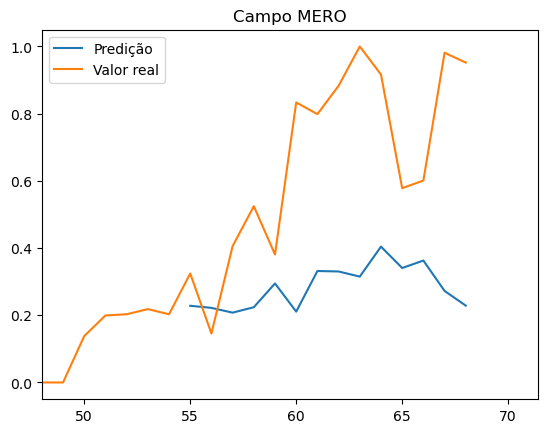

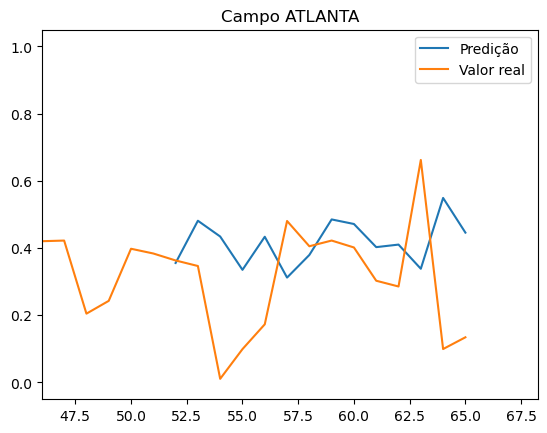

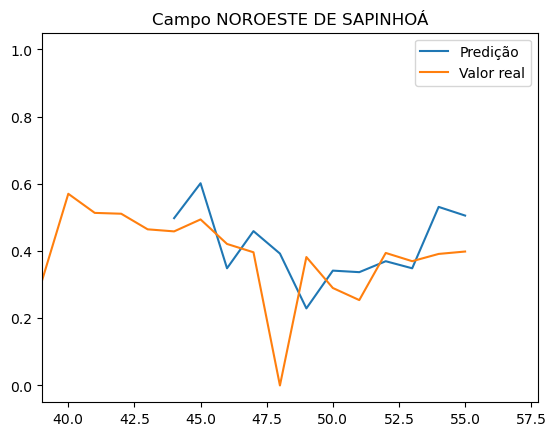

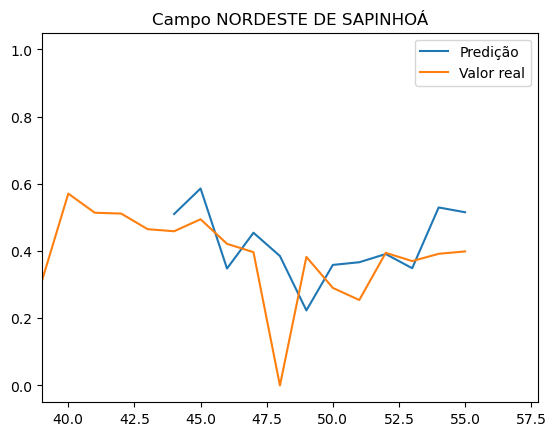

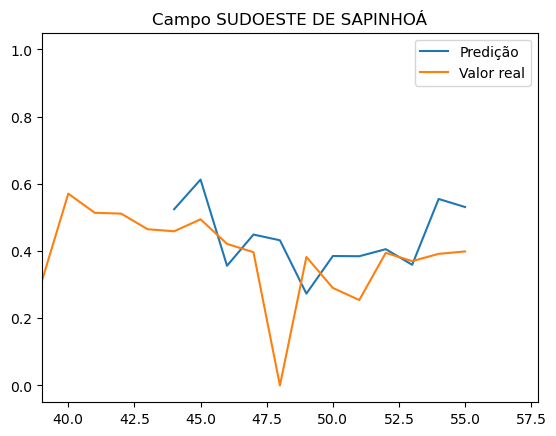

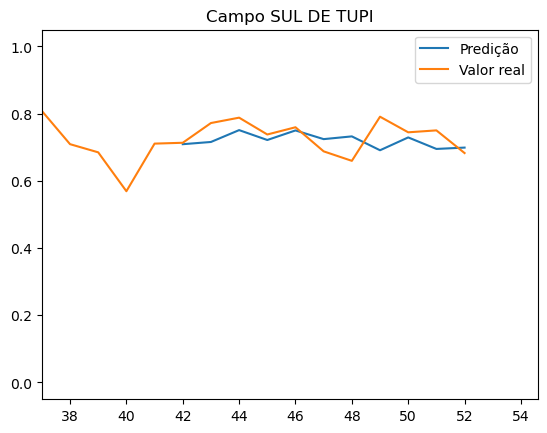

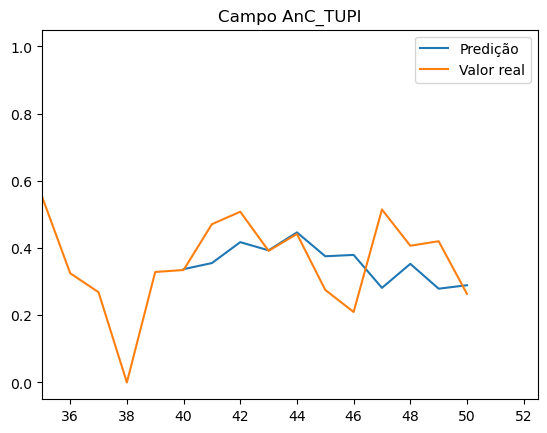

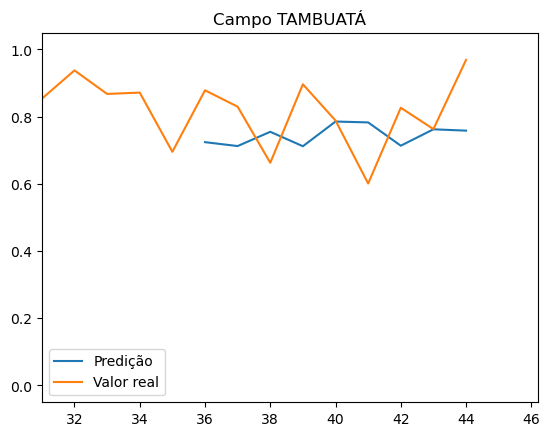

In [48]:
resultados = {
    'campo':[] ,
    'preds': [] ,
    'y_test':[] ,
}
for campo in pipe.keys():
    tam = (int) (pipe[campo][0].shape[0] * 0.8)
    
    x_train = pipe[campo][0][10: tam , :-1]

    y_train = pipe[campo][0][10: tam , -1]

    x_train_transform = x_train.reshape(-1,1,10)

    reg = RocketRegressor(rocket_transform='multirocket', num_kernels = 10000)

    reg.fit(x_train_transform , y_train)

    x_test = pipe[campo][0][tam:, :-1].reshape(-1,1,10)
    y_test = pipe[campo][0][tam:, -1]

    preds = reg.predict(x_test)

    #Plot of real values and forecasting
    plt.plot(range(int(pipe[campo][0].shape[0] * 0.8),pipe[campo][0].shape[0]) ,preds.reshape(-1), label='Predição')
    plt.plot(pipe[campo][0][: ,-1], label='Valor real')
    #plt.plot(range(int(0.8 * linhas) , linhas),y_test, label='Valor real')
    plt.legend()
    plt.title('Campo '+str(campo) )
    plt.xlim(int(pipe[campo][0].shape[0] * 0.7))
    plt.show()

    resultados['campo'].append(campo)
    resultados['preds'].append( preds.reshape(-1) )
    resultados['y_test'].append( y_test )
    

In [50]:
resultados_multirocket = pd.DataFrame(resultados)

In [51]:
resultados_multirocket['mse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds']) for i in resultados_multirocket.iterrows()]
resultados_multirocket['rmse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds'],squared=False) for i in resultados_multirocket.iterrows()]
resultados_multirocket['mae'] = [ mean_absolute_error(i[1]['y_test'], i[1]['preds']) for i in resultados_multirocket.iterrows()]

resultados_multirocket['mse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_multirocket.iterrows()]
resultados_multirocket['rmse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]],squared=False) for i in resultados_multirocket.iterrows()]
resultados_multirocket['mae_1'] = [ mean_absolute_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_multirocket.iterrows()]

In [52]:
resultados_multirocket

,campo,preds,y_test,mse,rmse,mae,mse_1,rmse_1,mae_1
0,TUPI,"[0.8883516507687284, 0.9509864380151821, 0.937...","[0.9346853303678871, 0.858672116751974, 0.8214...",0.007803,0.088337,0.076047,2.146810e-03,0.046334,0.046334
1,BAÚNA,"[0.16374840036125615, 0.14831256074077603, 0.1...","[0.19426939324808262, 0.2011099387982297, 0.19...",0.005471,0.073964,0.040115,9.315310e-04,0.030521,0.030521
2,URUGUÁ,"[0.12678684648167132, 0.22902581048019252, 0.3...","[0.0, 0.059903666970963214, 0.3589638811011853...",0.022507,0.150025,0.124493,1.607490e-02,0.126787,0.126787
3,SAPINHOÁ,"[0.6665987328529215, 0.7089104296693005, 0.769...","[0.7253528786275888, 0.7506802697586767, 0.758...",0.009266,0.096258,0.077275,3.452050e-03,0.058754,0.058754
4,MEXILHÃO,"[0.49297079102910346, 0.4731725012772885, 0.43...","[0.5085489239787171, 0.44042943538577345, 0.44...",0.011274,0.106180,0.066478,2.426782e-04,0.015578,0.015578
5,LAPA,"[0.9456475876368617, 0.6637317125180235, 0.731...","[0.5680982913057375, 1.0, 0.9655466459597909, ...",0.033137,0.182035,0.155174,1.425435e-01,0.377549,0.377549
6,TAMBAÚ,"[0.11421720714336497, 0.06504196720450123, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.042408,0.205931,0.202701,1.304557e-02,0.114217,0.114217
7,BÚZIOS,"[0.8194263218366287, 0.8303749426268163, 0.782...","[0.932382414687467, 0.8759870196789367, 0.2342...",0.381069,0.617308,0.418789,1.275908e-02,0.112956,0.112956
8,SÉPIA,"[-4.180479115878377e-06, 0.10009589025405571, ...","[0.06684844296985575, 0.3847752319544375, 0.39...",0.185406,0.430588,0.377202,4.469273e-03,0.066853,0.066853
9,BERBIGÃO,"[0.5303857058983015, 0.4736587058962926, 0.386...","[0.42485207100591715, 0.35557297838434193, 0.4...",0.022531,0.150104,0.111761,1.113735e-02,0.105534,0.105534


In [54]:
resultados_multirocket.to_csv('resultados_multirocket.csv', index=False)

# Rocket 

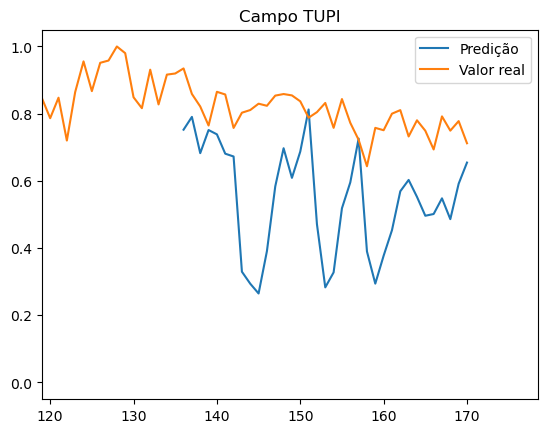

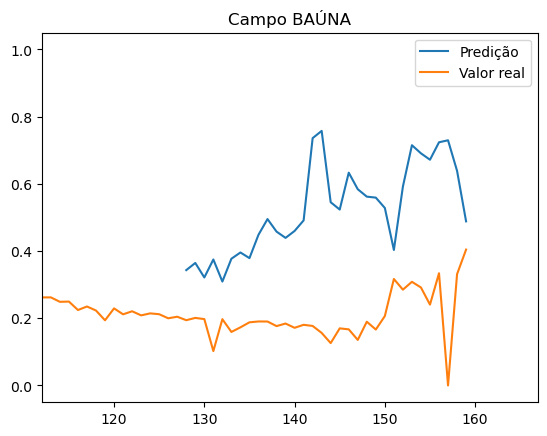

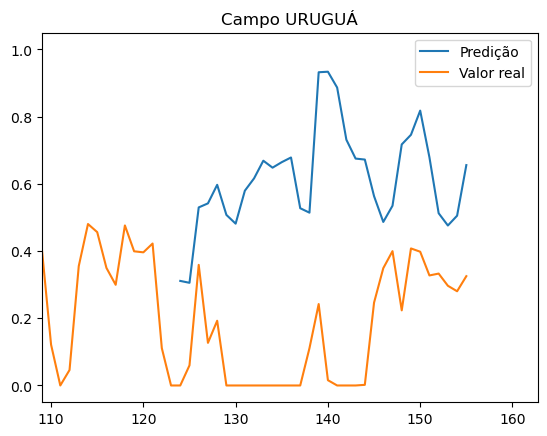

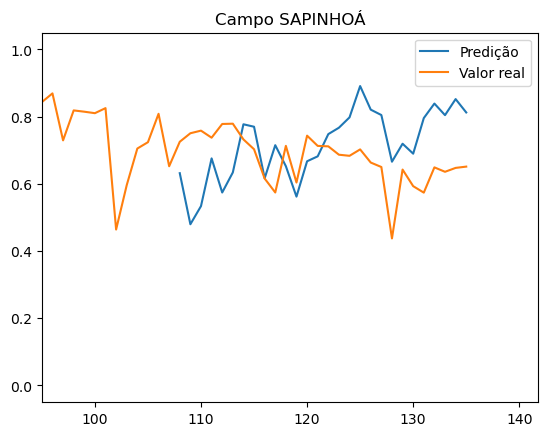

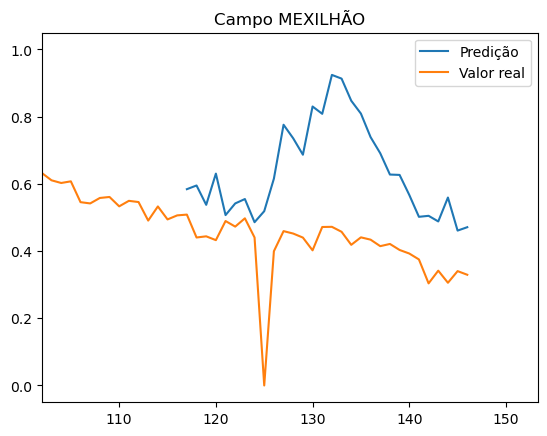

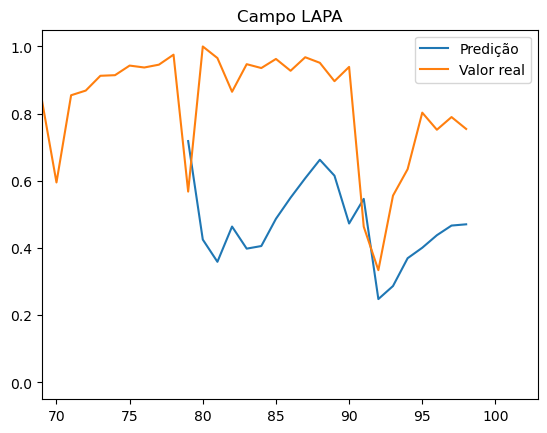

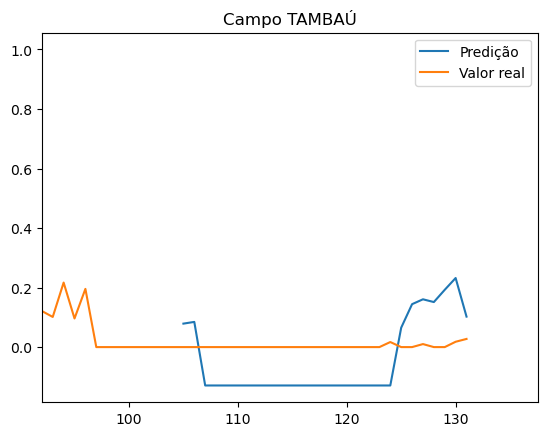

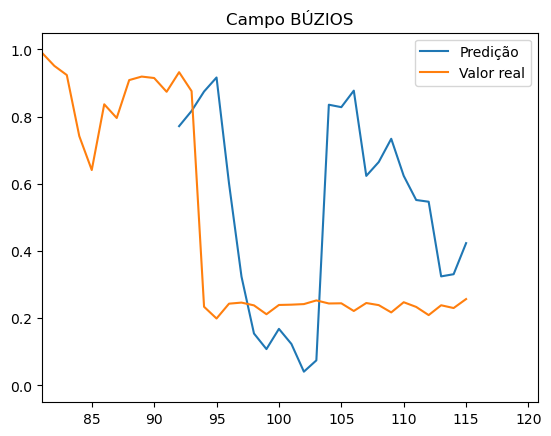

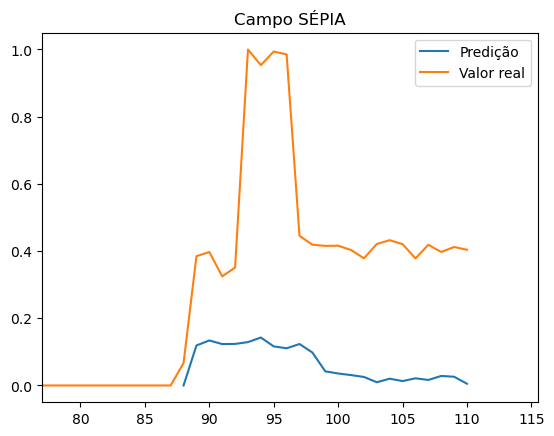

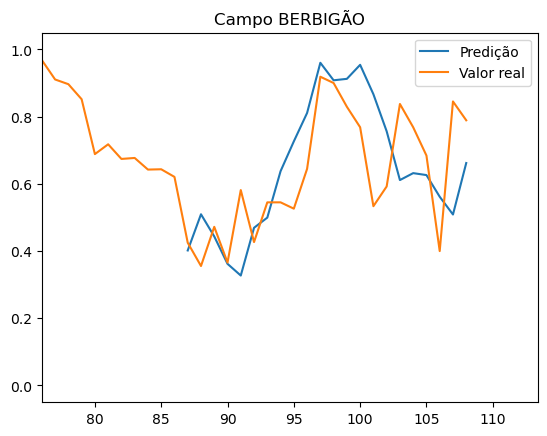

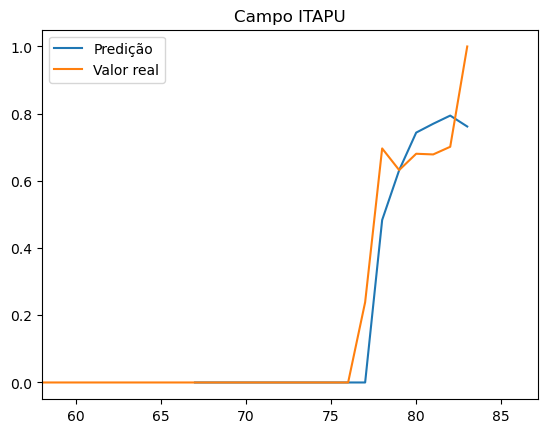

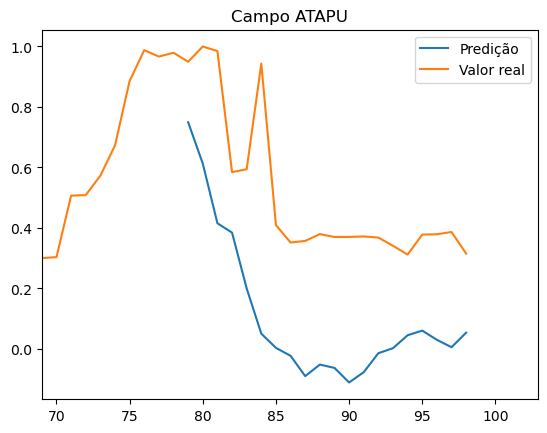

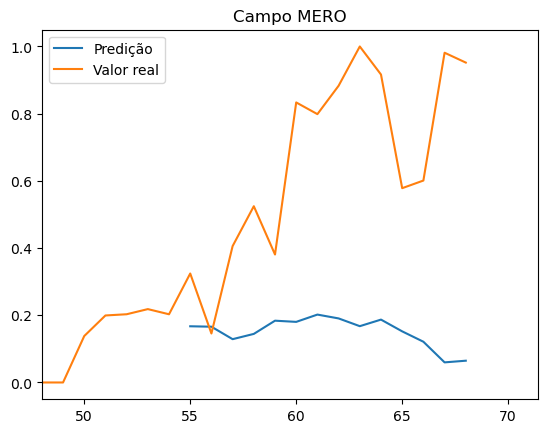

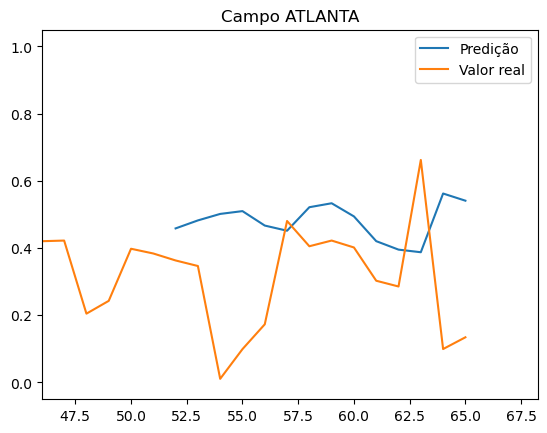

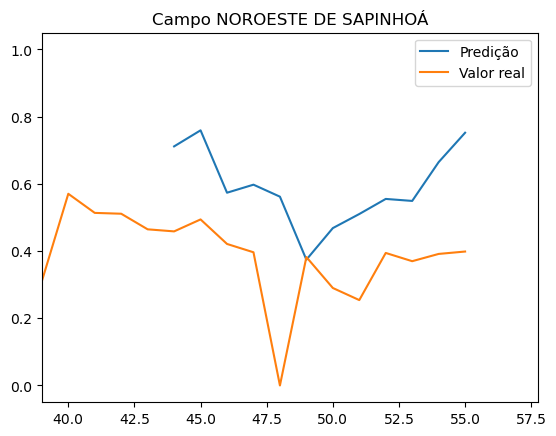

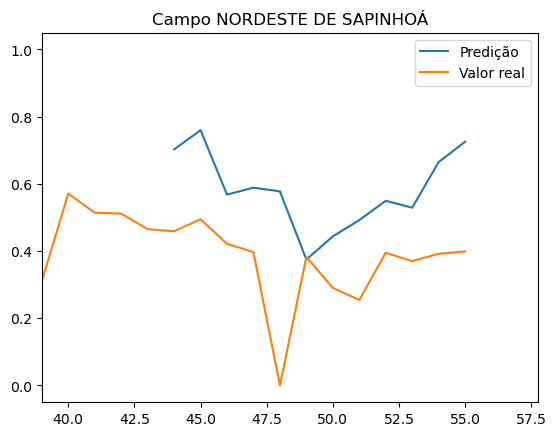

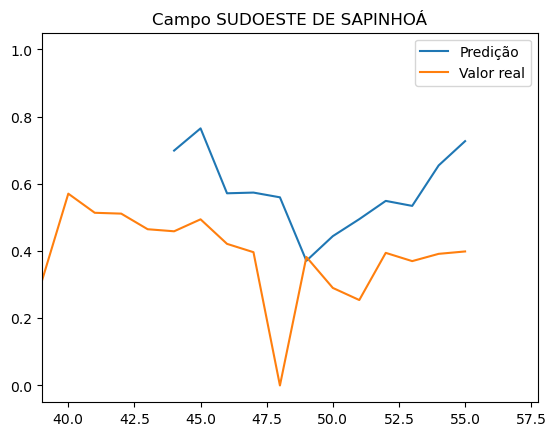

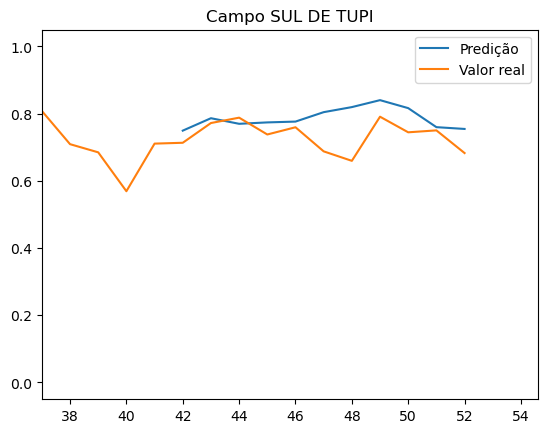

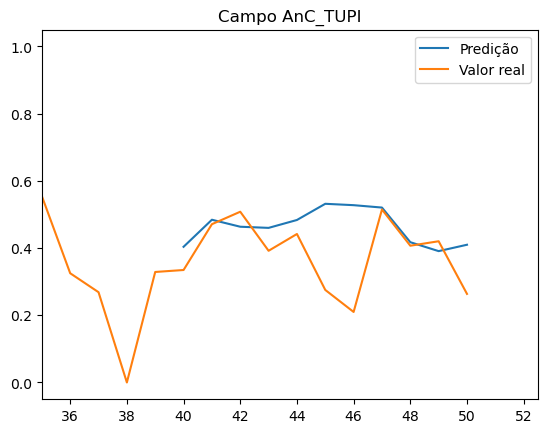

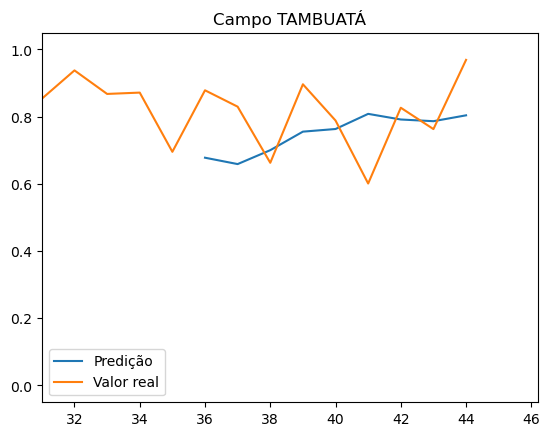

In [55]:
resultados = {
    'campo':[] ,
    'preds': [] ,
    'y_test':[] ,
}
for campo in pipe.keys():
    tam = (int) (pipe[campo][0].shape[0] * 0.8)
    
    x_train = pipe[campo][0][10: tam , :-1]

    y_train = pipe[campo][0][10: tam , -1]

    x_train_transform = x_train.reshape(-1,1,10)

    reg = RocketRegressor(rocket_transform='rocket')

    reg.fit(x_train_transform , y_train)

    x_test = pipe[campo][0][tam:, :-1].reshape(-1,1,10)
    y_test = pipe[campo][0][tam:, -1]

    preds = reg.predict(x_test)

    #Plot of real values and forecasting
    plt.plot(range(int(pipe[campo][0].shape[0] * 0.8),pipe[campo][0].shape[0]) ,preds.reshape(-1), label='Predição')
    plt.plot(pipe[campo][0][: ,-1], label='Valor real')
    #plt.plot(range(int(0.8 * linhas) , linhas),y_test, label='Valor real')
    plt.legend()
    plt.title('Campo '+str(campo) )
    plt.xlim(int(pipe[campo][0].shape[0] * 0.7))
    plt.show()

    resultados['campo'].append(campo)
    resultados['preds'].append( preds.reshape(-1) )
    resultados['y_test'].append( y_test )
    

In [56]:
resultados_rocket = pd.DataFrame(resultados)

In [57]:
resultados_rocket['mse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds']) for i in resultados_rocket.iterrows()]
resultados_rocket['rmse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds'],squared=False) for i in resultados_rocket.iterrows()]
resultados_rocket['mae'] = [ mean_absolute_error(i[1]['y_test'], i[1]['preds']) for i in resultados_rocket.iterrows()]

resultados_rocket['mse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_rocket.iterrows()]
resultados_rocket['rmse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]],squared=False) for i in resultados_rocket.iterrows()]
resultados_rocket['mae_1'] = [ mean_absolute_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_rocket.iterrows()]

In [58]:
resultados_rocket.to_csv('resultados_rocket.csv', index=False)

# Minirocket

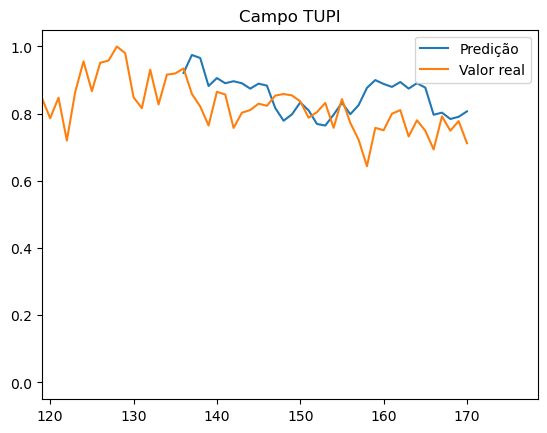

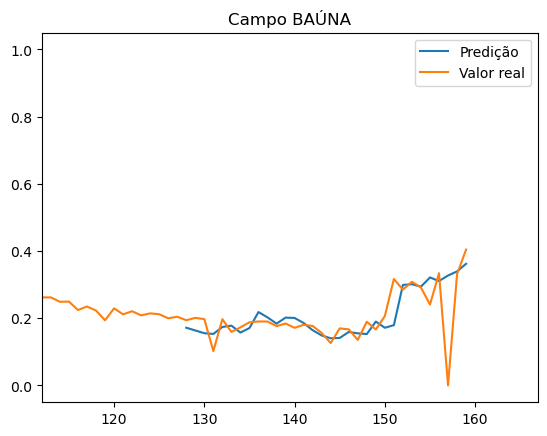

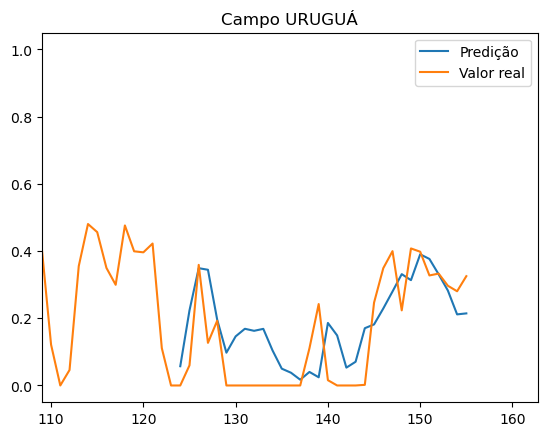

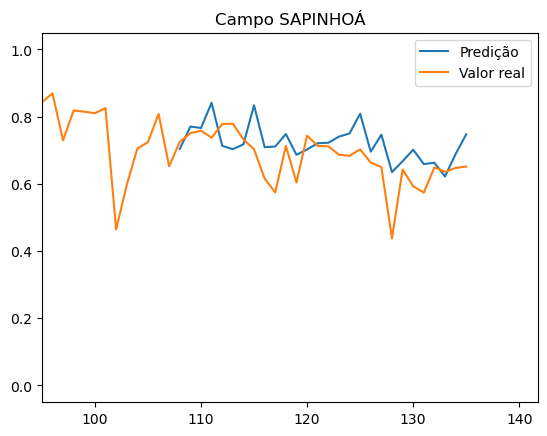

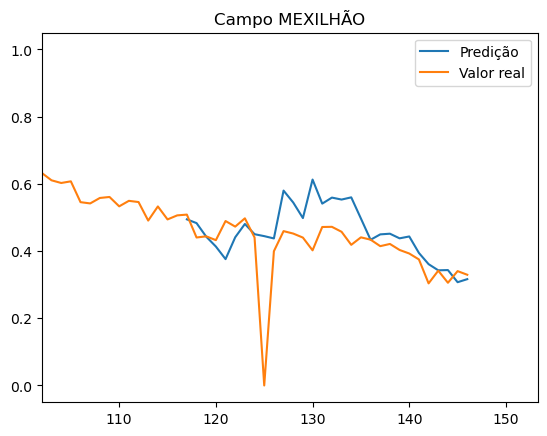

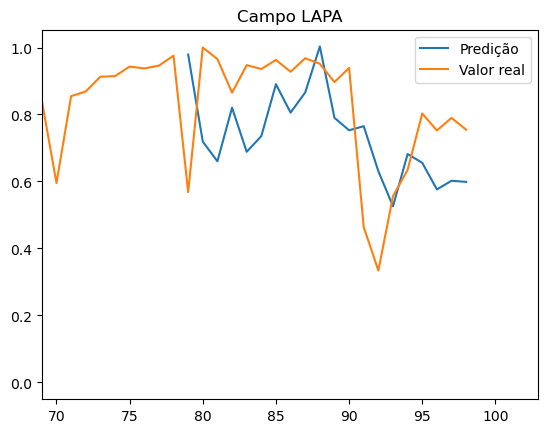

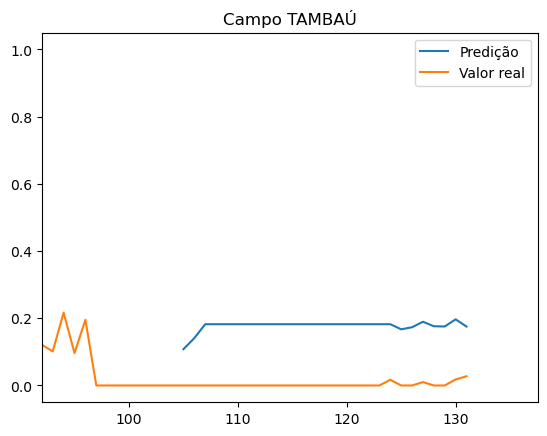

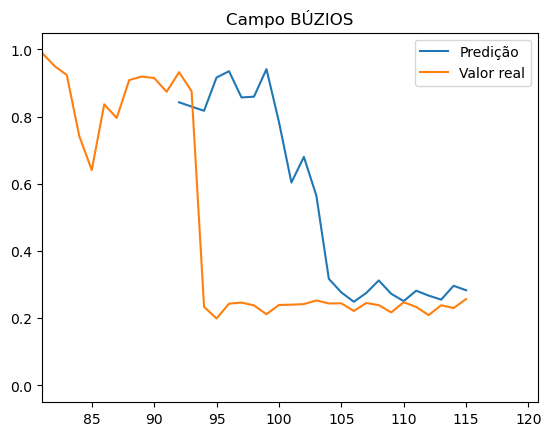

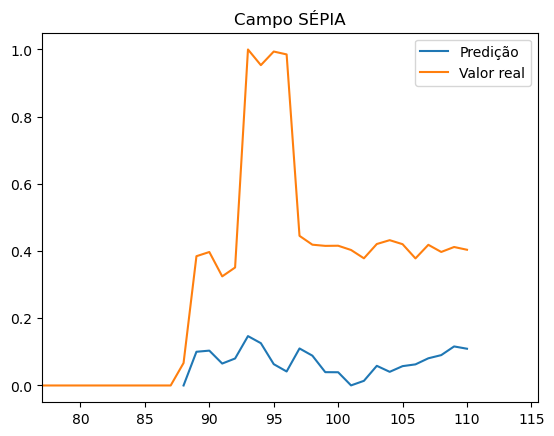

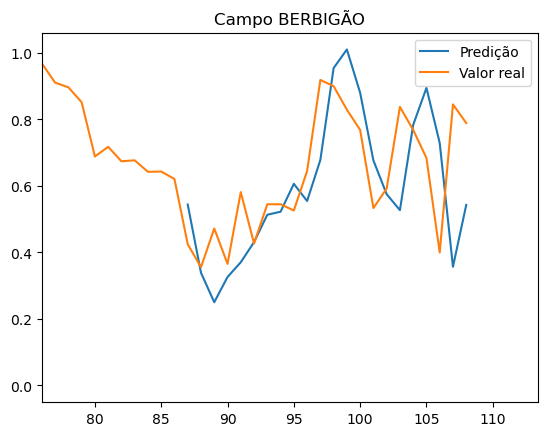

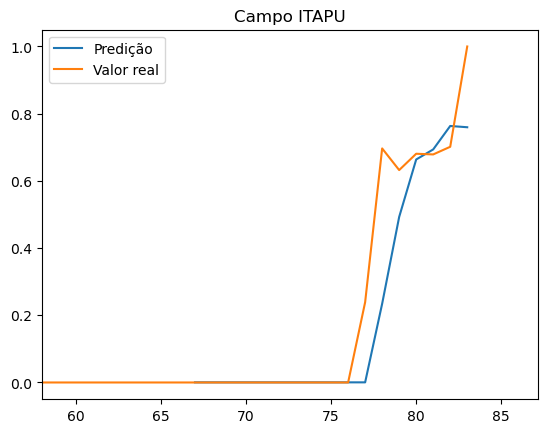

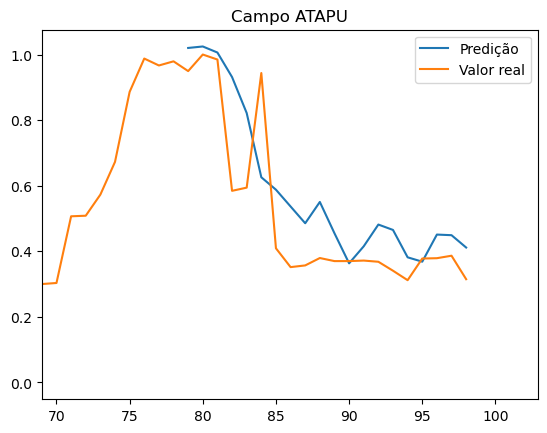

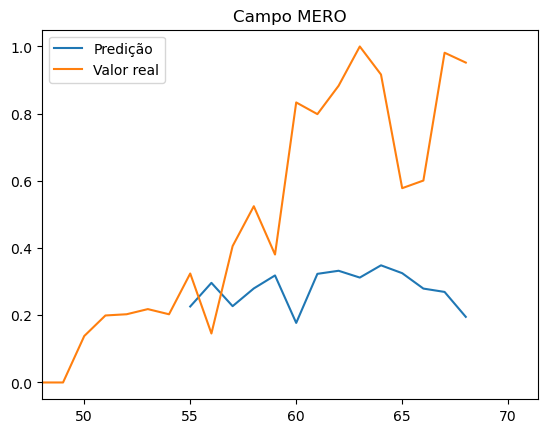

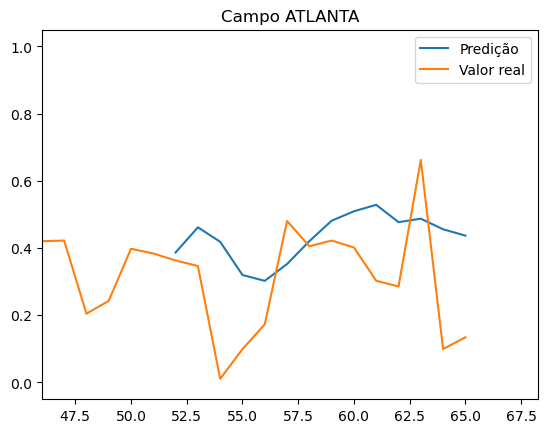

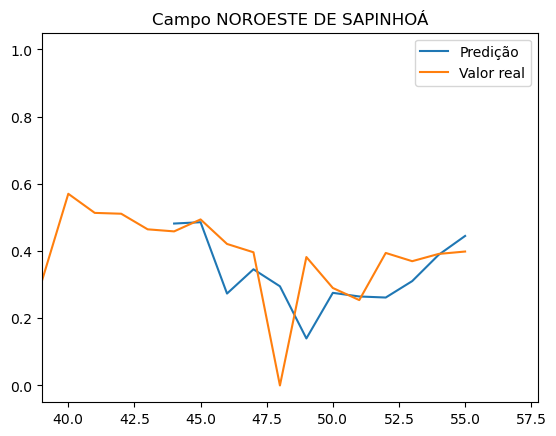

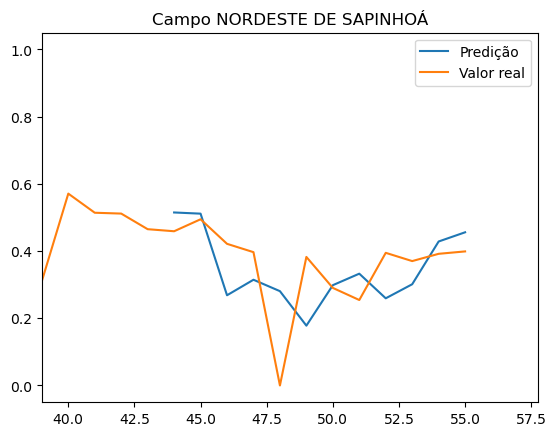

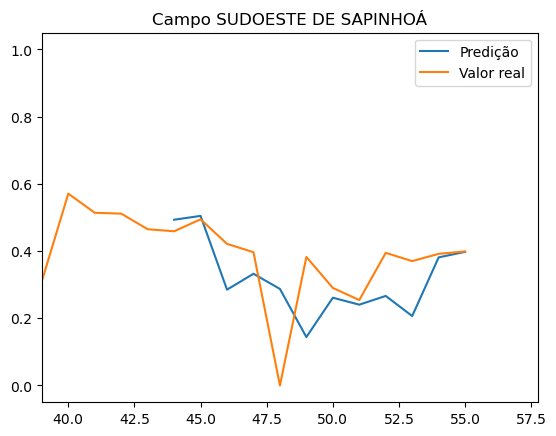

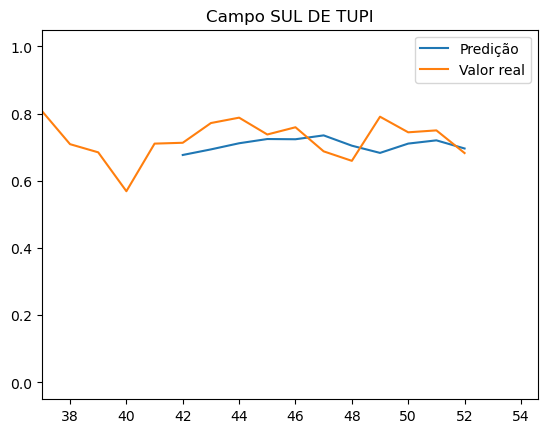

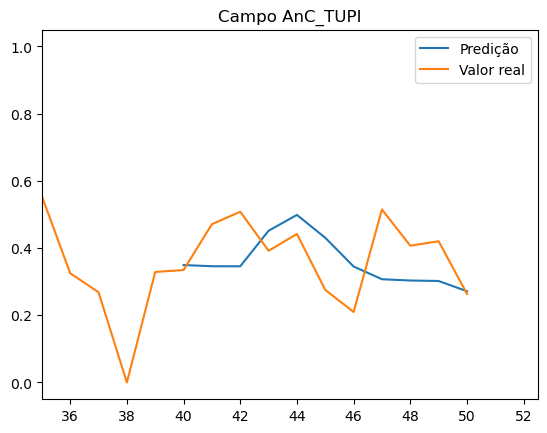

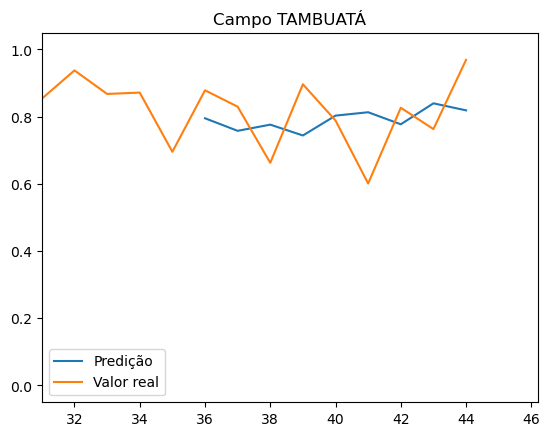

In [59]:
resultados = {
    'campo':[] ,
    'preds': [] ,
    'y_test':[] ,
}
for campo in pipe.keys():
    tam = (int) (pipe[campo][0].shape[0] * 0.8)
    
    x_train = pipe[campo][0][10: tam , :-1]

    y_train = pipe[campo][0][10: tam , -1]

    x_train_transform = x_train.reshape(-1,1,10)

    reg = RocketRegressor(rocket_transform='minirocket')

    reg.fit(x_train_transform , y_train)

    x_test = pipe[campo][0][tam:, :-1].reshape(-1,1,10)
    y_test = pipe[campo][0][tam:, -1]

    preds = reg.predict(x_test)

    #Plot of real values and forecasting
    plt.plot(range(int(pipe[campo][0].shape[0] * 0.8),pipe[campo][0].shape[0]) ,preds.reshape(-1), label='Predição')
    plt.plot(pipe[campo][0][: ,-1], label='Valor real')
    #plt.plot(range(int(0.8 * linhas) , linhas),y_test, label='Valor real')
    plt.legend()
    plt.title('Campo '+str(campo) )
    plt.xlim(int(pipe[campo][0].shape[0] * 0.7))
    plt.show()

    resultados['campo'].append(campo)
    resultados['preds'].append( preds.reshape(-1) )
    resultados['y_test'].append( y_test )
    

In [60]:
resultados_minirocket = pd.DataFrame(resultados)

In [61]:
resultados_minirocket['mse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds']) for i in resultados_minirocket.iterrows()]
resultados_minirocket['rmse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds'],squared=False) for i in resultados_minirocket.iterrows()]
resultados_minirocket['mae'] = [ mean_absolute_error(i[1]['y_test'], i[1]['preds']) for i in resultados_minirocket.iterrows()]

resultados_minirocket['mse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_minirocket.iterrows()]
resultados_minirocket['rmse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]],squared=False) for i in resultados_minirocket.iterrows()]
resultados_minirocket['mae_1'] = [ mean_absolute_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_minirocket.iterrows()]

In [62]:
resultados_minirocket.to_csv('resultados_minirocket.csv', index=False)